## Project: Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B testing is a valuable and widely practiced method in the industry. A/B tests are used to test changes on a web page by running an experiment where a control group sees the old version, while the experiment group sees the new version. A metric is then chosen to measure the level of engagement from users in each group. These results are then used to decide whether one version is more effective than the other. A/B testing is very much like hypothesis testing.

In this project, an A/B test is run for an e-commerce website. The goal is to help the business understand if they should launch the new page, keep the old page, or perhaps run the experiment longer to finalize their decision.


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [57]:
# Importing libraries 
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
# Seed is set 
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.

a. Read in the dataset and take a look at the top few rows.

In [58]:
# Loading the dataset 
df = pd.read_csv('ab_data.csv')
# Checking top five rows 
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [59]:
# Finding the number of the rows 
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [60]:
# Investigating the number of unique users 
df['user_id'].nunique()

290584

The difference in the number of rows (in 1b) and the number of unique users (in 1c) means that there are duplicated entries in the dataset. So, we'll use drop_duplicates() function.

d. The proportion of users converted.

In [61]:
# Calculating the proportion of users converted 
df.drop_duplicates('user_id').converted.mean()

0.1195695564793657

The converted column in the dataset contains only two values: either 1 or 0. Therefore, the .mean() function is used to sum up all the occurrences where the value is 1 and divide by the number of rows to give the proportion.

e. The number of times the `new_page` and `treatment` don't line up.

There are two cases when the new_page and treatment do not match. The first case is when the group is control and the landing page is new. The second case is when the group is treatment and the landing page is old. The sum of these two cases will give us the required number. 

In [62]:
# Group is control and landing page is new
df.query('group == "control"').query('landing_page == "new_page"')['user_id'].count()

1928

In [63]:
# Group is treatment and landing page is old
df.query('group == "treatment"').query('landing_page == "old_page"')['user_id'].count()

1965

In [64]:
# Number of times the new_page and treatment do not line up
df.query('group == "control"').query('landing_page == "new_page"')['user_id'].count() + df.query('group == "treatment"').query('landing_page == "old_page"')['user_id'].count()

3893

f. Do any of the rows have missing values?

In [65]:
# Investigating missing values 
df.isnull().values.any()

False

The dataset does not contain any missing values.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page. Therefore, these rows will be removed.

a. The mismatched rows are deleted and the dataframe is stored as df2.  

In [66]:
# Group is control and landing page is new
mismatch1 = df.query('group == "control"').query('landing_page == "new_page"')['user_id']

In [67]:
# Dropping mismatch1 dataset
df1 = df.drop(mismatch1.index)

In [68]:
# Group is treatment and landing page is old
mismatch2 = df1.query('group == "treatment"').query('landing_page == "old_page"')['user_id']

In [69]:
# Dropping mismatch2 dataset
df2 = df1.drop(mismatch2.index)

In [70]:
# Double checking all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [71]:
# Taking a look at the first few rows of df2
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


`3.` Use **df2** to answer the following questions.

a. How many unique **user_id**s are in **df2**?

In [72]:
# Finding the unique user ids
df2['user_id'].nunique()

290584

In [73]:
# Finding the total number of rows 
df2.shape

(290585, 5)

b. There is one **user_id** repeated in **df2**.  What is it?

In [74]:
# Finding the repeated user id 
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [75]:
# Row information of the repeated user id 
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [76]:
# Removing one duplicate row 
df2.drop_duplicates(subset='user_id', keep="first", inplace=True)

In [77]:
# Checking if the duplicate row is removed 
df2.shape

(290584, 5)

`4.` Use **df2** in the below cells to answer the following questions.

a. What is the probability of an individual converting regardless of the page they receive?

In [78]:
# The probability of an individual converting 
# regardless of the page 
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [79]:
# Calculating the probability of contol group converting 
df2.query("group == 'control'")['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [80]:
# Calculating the probability of treatment group converting 
df2.query("group == 'treatment'")['converted'].mean()

0.11880806551510564

In [81]:
# Actual difference observed in the dataset
actual_diff = df2.query("group == 'treatment'")['converted'].mean() - df2.query("group == 'control'")['converted'].mean()
actual_diff

-0.0015782389853555567

d. What is the probability that an individual received the new page?

In order to obtain the desired probability, the categorical variable landing_page column is converted to dummy variables with 0, 1 encodings. Two dummy columns are created - new_page and old_page. Then, the mean is calculated for the new_page column.

In [82]:
# Converting to dummy columns 
new_page = pd.get_dummies(df2['landing_page'])
# Results are stored in d3 
df3 = df2.join(new_page)
df3.head()

,user_id,timestamp,group,landing_page,converted,new_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


In [83]:
# Probability of an individual received new page 
df3.new_page.mean()

0.5000619442226688

In [84]:
# Probability of an individual received old page 
df3.old_page.mean()

0.4999380557773312

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

There is no suffiecient evidence to say that the new treatment page leads to more conversions. Athough, the probability that an individual received the new page (0.5) is greater than the old page (0.49), the conversion rate of control group (0.12) is grater than the treatment group (0.118) by 0.2%. For some companies, this 0.2% difference in performance could be worth considering. 

<a id='ab_test'></a>
### Part II - A/B Test

`1.` In part II of A/B testing, the null and alternative hypotheses are created. It is assumed that the old page is better unless the new page proves to be definitely better at a Type I error rate (α) of 5%. Here, **$p_{old}$** and **$p_{new}$** are the converted rates for the old and new pages. 
<br>To be noted, the A/B test is performed and results are discussed only based on the available data. The duration of the experiment or how long the test should run is not considered in this project.

Null hypothesis, $H_{0}$ : $p_{old}$>=$p_{new}$
<br>Alternative hypothesis, $H_{1}$ : $p_{new}$>$p_{old}$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  

a. What is the **convert rate** for $p_{new}$ under the null? 

In [85]:
# Convert rate for pnew under the null
pnew = df2.converted.mean()
pnew

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [86]:
#Convert rate for Pold
pold = df2.converted.mean()
pold

0.11959708724499628

c. What is $n_{new}$?

In [87]:
# Size of treatment group 
nnew = df2.query('group == "treatment"')['user_id'].count()
nnew

145310

d. What is $n_{old}$?

In [88]:
# Size of control group 
nold = df2.query('group == "control"')['user_id'].count()
nold

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

For this calculation, samples are drawn from a bionominal distribution with specified parameters, n trials and p probability of success where n an integer >= 0 and p is in the interval [0,1]. The Binomial Distribution helps to determine the probability of a string  in the datasets with tracking any outcome with two possible events. One of the most popular places binomial distribution is found is logistic regression. 

In [89]:
# n=1 trial size, p=probability of trial, size=number of trials to run
new_page_converted = np.random.binomial(1, pnew, nnew)
new_page_converted.mean()

0.11966829536852247

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [90]:
# n=1 trial size, p=probability of trial, size=number of trials to run
old_page_converted = np.random.binomial(1, pold, nold)
old_page_converted.mean()

0.11876867161364044

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [91]:
# Difference in the simulted conversion rate
obs_diff = new_page_converted.mean() - old_page_converted.mean()
obs_diff
print("pnew - pold: ", obs_diff)

pnew - pold:  0.0008996237548820341


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [92]:
# Simulating 10,000 pnew - pold values 
p_diffs = []

for _ in range(1000):
    new_page_converted = np.random.binomial(1, pnew, nnew)
    old_page_converted = np.random.binomial(1, pold, nold)
    new_page_mean = new_page_converted.mean()
    old_page_mean = old_page_converted.mean()
    p_diffs.append(new_page_mean - old_page_mean)

In [93]:
# Storing simulated values in a numpy array 
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**. Does this plot look like what you expected? 

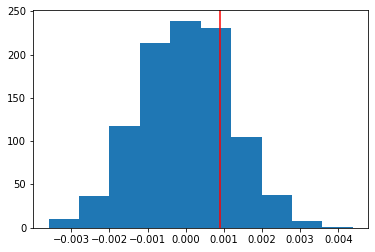

In [94]:
# Plotting a histogram of p_diffs
plt.hist(p_diffs);
# Locating the obs_diff on the histogram
plt.axvline(x = obs_diff, color ='red');

The histogram displays a normal distribution as the curve is bell-shaped. According to the Central Limit Theorem, with large enough sample sizes, the sample mean will follow a normal distribution. 

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [95]:
# Calculating the proportion of p_diffs greater than obs_diff
(p_diffs > actual_diff).mean()

0.902

This means that 90.2% of values in p_diffs are equal or bigger than the actual difference observed in ab_data.csv dataset. difference. To be noted, the actual observed difference is just one value, and the simulated distributions are 10,000 values. In other words, 90.2% of the results in the simulated distribution is as or more extreme as the observed difference. Therefore, we fail to reject the null hypothesis. 

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**P-vaule is computed in part j. The definition of a p-value is the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true. Here, the p-value is close to 1, therefore, no evidence to reject the null hypothesis. In other words, if the p-value is less than the Type I error threshold (which is 0.05), then we have evidence to reject the null and choose the alternative. Otherwise, we fail to reject the null hypothesis.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [41]:
# Importing necessary libraries 
import statsmodels.api as sm
from scipy.stats import norm
# Calculating number of conversions for each page 
convert_old = (df2[(df2['landing_page']=='old_page') & (df2['converted']==1)]).shape[0]
convert_new = (df2[(df2['landing_page']=='new_page') & (df2['converted']==1)]).shape[0]
# Calculating number of individuals received each page 
n_old = df2.query('group == "control"')['user_id'].shape[0]
n_new = df2.query('group == "treatment"')['user_id'].shape[0]
# Print the results 
print(convert_old, convert_new, n_old, n_new)

17489 17264 145274 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

Here, stats.proportions_ztest is a built-in function that tests for proportions based on normal (z) test. This test provides a  critical value of z (z-score), which is used when the sampling distribution is normal, or close to normal. The z-score is nothing but a point on standard normal distribution of our values. This z-score tells how far from mean of distribution a point lies. And this value is further used to calculate the p-value [1]. 
<br>Test Statistic <= Critical Value: Fail to reject the null hypothesis of the statistical test.
<br>Test Statistic > Critical Value: Reject the null hypothesis of the statistical test.

In [42]:
# Computing z_score and p_value 
nobs = [n_new, n_old]
count = [convert_new, convert_old]
z_test , p_value = sm.stats.proportions_ztest(count, nobs, alternative ='larger')
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative = 'larger')
z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The p-value is 0.905, which is close to 1. Moreover, a p-value higher than α (0.05) is not statistically significant. This means, our findings are more leaning toward the old page as still there is no proof that the new page is performing better. Although, the p-value computed in parts j. and k. (0.902) is slightly different to the p-value in parts l. and m. (0.905), both provide strong evidences for the null hypothesis.**

Now, in order to calculate the z-critical value, we will use the percent point function (PPF). This function returns the observation value for the provided probability that is less than or equal to the provided probability from the distribution. For our one-sided test, we calculate:

In [43]:
# Calculating z-critical value
# alpha = 0.05 
print(norm.ppf(1-(0.05)))

1.6448536269514722


As the z-score (-1.311) is less than the z-critical value (1.645), it is less significant, and hence, we are likely to fail to reject the null hypothesis here.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**We are predicting a categorical response in this test. Therefore, we will use the logistic regression model. The logistic regression predicts only two possible outcomes, here, for example, either a conversion or no conversion.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [44]:
# Adding an intercept column 
df2['intercept'] = 1
# Adding an ab_page column 
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [45]:
# Importing statsmodels 
import statsmodels.api as sm
# Instantiating the model
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
# Fitting the model
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 17 Jul 2021   Pseudo R-squ.:               8.077e-06
Time:                        10:25:53   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In order to interpret the results, we need to exponentiate each variables.

In [46]:
# Exponentiating the variables 
np.exp(-0.015)

0.9851119396030626

In this regression model, we got a coeffiecient of 0.985 for ab_page with a p-value of 0.19. Since, the ab_page has 'treatment' set to 1 and 'control' set to 0, the control group is 1- 0.985 or 0.015 times more likely to convert. This result echos the result from part I (e.), where the old page is found to perform slightly better than the new page. The model indicates that each one unit increase in the ab_page, conversion is 0.985 times likely, holding all other variables constant. 
<br>When we receive multiplicative changes less than 1, it is often useful to calculate the reciprocal. This flip often help the audiance to better relate to the results.

In [47]:
# Obtaining the reciprocal
1/np.exp(-0.015)

1.015113064615719

This changes the direction of the unit increase to unit decrease. So, we could say, for every 1 unit decrease in ab_page, conversion is 1.015 times likely, holding all else constant. 
From this regression model, p-value is not less than 0.05 (α); which means ab_page is not statistically significant. 
Therefore, no matter which page a person receives, it does not change the rate of conversion. The conversion rate does not change for different pages.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p-value associated with ab_page is 0.19. In logistic regression, we use a two-tailed test where the p-value is calculated as 2*(1-p_value) = 2*(1-0.9) = 0.19. The p-value is different than part II. In part II, we used a one-tailed test and in part III, we used a two-tailed test.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Based on the p-value for ab_page, we do not have statistical evidence to suggest a significant relationship between conversion and landing page, so it is worth exploring whether other variables may influence the conversion instead.**

**The disadvantage of adding additional factors into a regression model is collinearity. We want our predictor variables to correlate with our response variable (have a linear relationship), but when we add more predictor variables they might end up correlating with each other [2].**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [48]:
# Reading in the countries dataset
countries_df = pd.read_csv('./countries.csv')
# Merging the two datasets 
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [49]:
# Checking first five columns of the new dataframe
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [50]:
# To check how many countries are listed 
df_new.groupby('country').count()

,timestamp,group,landing_page,converted,intercept,ab_page
country,,,,,,
CA,14499,14499,14499,14499,14499,14499
UK,72466,72466,72466,72466,72466,72466
US,203619,203619,203619,203619,203619,203619


In [51]:
# Creating necessary dummy variables
df_new[['UK', 'US', 'CA']] = pd.get_dummies(df_new['country'])[['UK','US','CA']]
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,CA
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,0


When we create dummy variables using 0, 1 encodings, we always need to drop one of the columns from the model to make sure the matrices are full rank (and that our solutions are reliable from Python). In order to invert matrices, a matrix must be full rank (that is, all the columns need to be linearly independent). Therefore, we need to drop one of the dummy columns, to create linearly independent columns (and a full rank matrix).

In [52]:
# Instantiating the model to observe the effects of pages and countries on the conversion 
log_mod2 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'US']])
# Fitting the model
results = log_mod2.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 17 Jul 2021   Pseudo R-squ.:               2.323e-05
Time:                        10:25:56   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

In [53]:
# In order to interpret the results we need to exponentiate each variables 
np.exp(results.params)

intercept    0.131332
ab_page      0.985168
UK           1.051944
US           1.041599
dtype: float64

Each of these resulting values is a multiplicative change in the odd. Looking at the results, if an individual is from UK, he is 1.05 times likely to convert than US, holding all other variables constant (means the ab_page does not change). For each unit change in ab_page, conversion is 0.98 times likely holding all else constant. Here, none of the p-values are less than α, which means the variables are not significant in increasing the conversion rate of the new page. Thus, we fail to reject our null hypothesis.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [54]:
# Creting interaction columns 
df_new['UK_page'] = df_new['UK'] * df_new['ab_page']
df_new['US_page'] = df_new['US'] * df_new['ab_page']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,CA,UK_page,US_page
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,0,1,0


In [55]:
# Instantiating model to observe the interactive effects of pages and countries 
log_mod3 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'US', 'UK_page', 'US_page']])
results = log_mod3.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sat, 17 Jul 2021   Pseudo R-squ.:               3.482e-05
Time:                        10:25:58   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK_page        0.0783      0.057      1.378      0.168      -0.033       0.190
US_page        0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

In [56]:
# In order to interpret the reults, we first need to exponentiate each 
np.exp(results.params)

intercept    0.134794
ab_page      0.934776
UK           1.011854
US           1.017682
UK_page      1.081428
US_page      1.048001
dtype: float64

In the previous regression model (part III i.), we examined the effects of country and page individually on the conversion. Now, we would like to observe the impact of interaction between page and country to find out if they are significant factors for conversion. From the model, we can see that the p-values for the individual factors - ab_page, US, and UK are all greater than α (0.05). Even the interactive predictors - UK page and US page also produced p-values which are not smaller than α (0.05). Therefore, the interaction between landing page and country do not effect the conversion rate significantly. Hence, once again, we fail to reject the null hypothesis - the old page is performing better or at least equal to the new page. 

<a id='conclusions'></a>
## Conclusions

In this project, an A/B test is conducted for the e-commerce company website to decide whether the new landing page should be launched. Also, the A/B test results are cross-checked with a regression model analysis. From both the tests, the following results are evedent. 

- In A/B testing, we conclude that the new page does not increase conversion rate (alternative hypothesis with one-tailed test) significantly. That means the null is actually true, and we fail to reject it.

- In regression model, we conclude that the new page does not change the conversion rate (alternative hypothesis test with two-tailed test) significantly. Hence, we confirm that our null hypothesis holds true.

However, statistical significance itself does not imply that the results of a hypothesis test have practical consequence. Statistical significance relates to whether an effect exists and practical significance refers to the magnitude of the effect. With larger sample size, statistical significance becomes less relevant. When sample sizes are really large, everything appears statistically significant (that is we might end up rejecting essentially every null), but these results may not be practically significant. Confidence intervals (if applicable) are often more useful than hypothesis tests because they provide a way to assess practical significance in addition to statistical significance [3].

**Limitations:** In this project, time stamps are associated with each event. Therefore, we could technically run a hypothesis test continuously as each observation was observed. In that case, the difficult part is to decide how long should the experiment is run. Do we stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time? These questions are the difficult parts associated with A/B tests in general and are not covered in this project. 


<a id='resources'></a>
## Resources
[1] https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest

[2] https://datascience.stackexchange.com/questions/24452/in-supervised-learning-why-is-it-bad-to-have-correlated-features

[3]. https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/basic-statistics/inference/supporting-topics/basics/statistical-and-practical-significance/